# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

# Pandas Basic 4

In [1]:
from IPython.display import Image

reference = lambda file, w=None, h=None : \
    Image(filename=file, width=w, height=h) 

# images
Table5_1  = "images/Table5-1.png"   # DataFrame 생성자에서 사용 가능한 입력 데이터
Table5_2  = "images/Table5-2.png"   # pandas의 주요 Index 객체
Table5_3  = "images/Table5-3.png"   # Index 메소드와 속성
Table5_4  = "images/Table5-4.png"   # reindex 메소드(보간) 옵션
Table5_5  = "images/Table5-5.png"   # 재색인 함수 인자
Table5_6  = "images/Table5-6.png"   # DataFrame의 값 선택하기
Table5_7  = "images/Table5-7.png"   # 산술연산 메소드
Table5_8  = "images/Table5-8.png"   # 순위의 동률을 처리하는 메소드
Table5_9  = "images/Table5-9.png"   # 축소 메소드 옵션
Table5_10 = "images/Table5-10.png"  # 기술통계와 요약통계
Table5_11 = "images/Table5-11.png"  # 유일값, 값세기, 버리기 메소드
Table5_12 = "images/Table5-12.png"  # NA 처리 메소드
Table5_13 = "images/Table5-13.png"  # fillna 함수 인자

from pandas import Series, DataFrame
import pandas as pd
import numpy as np

## 4. Handling missing data 
> 누락된 데이터 처리하기 
- pandas의 설계 목표 중 하나는 누락 데이터를 가능한 한 쉽게 처리할 수 있도록 하는 것이다.
- pandas는 누락된 데이터를 실수든 아니든 모두 NaN(Not a Number)으로 취급한다.
- 그래서 누락된 값을 쉽게 찾을 수 있다.

In [2]:
string_data = Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [3]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [4]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

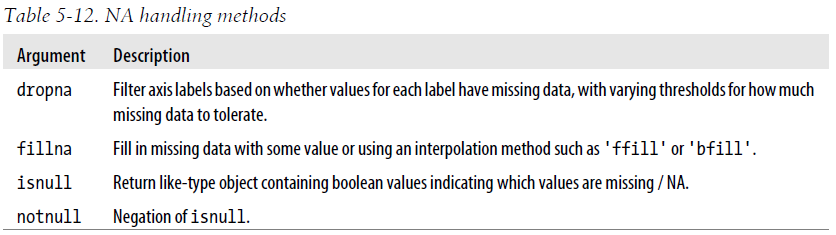

In [5]:
# NA 처리 메소드
reference(Table5_12, 600)

### <font color='brown'> Filtering out missing data </font>
> 누락된 데이터 골라내기
- Series에 대해 dropna 메소드를 적용하면, 실제 데이터가 들어있는 색인값과 Series값으로 반환한다.

In [6]:
from numpy import nan as NA
data = Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [7]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [8]:
data = DataFrame([[1., 6.5, 3.], [1., NA, NA], [NA, NA, NA], [NA, 6.5, 3.]])
data

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

In [9]:
cleaned = data.dropna()
cleaned

0    1    2
0  1.0  6.5  3.0

In [10]:
# 모든 값이 NA인 로우만 제외
data.dropna(how='all')

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
3  NaN  6.5  3.0

In [11]:
data[4] = NA
data

0    1    2   4
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN
2  NaN  NaN  NaN NaN
3  NaN  6.5  3.0 NaN

In [12]:
data.dropna(axis=1, how='all')

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

In [13]:
df = DataFrame(np.random.randn(7, 3))
df

0         1         2
0  0.473489  0.089882 -0.460063
1  1.695351 -0.058711  1.239651
2  1.180606 -0.195904  1.431912
3 -0.123851 -0.066920  2.065810
4  0.741265 -1.216357 -0.681765
5  1.721790  1.657416  0.587797
6 -0.890489  0.209056 -0.600781

In [14]:
df.iloc[:4, 1] = NA 
df.iloc[:2, 2] = NA
df

0         1         2
0  0.473489       NaN       NaN
1  1.695351       NaN       NaN
2  1.180606       NaN  1.431912
3 -0.123851       NaN  2.065810
4  0.741265 -1.216357 -0.681765
5  1.721790  1.657416  0.587797
6 -0.890489  0.209056 -0.600781

In [15]:
# thresh : 몇 개 이상의 값이 들어있는 로우만 살펴보고 싶을때 넣는 인자 값
df.dropna(thresh=3)

0         1         2
4  0.741265 -1.216357 -0.681765
5  1.721790  1.657416  0.587797
6 -0.890489  0.209056 -0.600781

In [16]:
df.dropna(thresh=2)

0         1         2
2  1.180606       NaN  1.431912
3 -0.123851       NaN  2.065810
4  0.741265 -1.216357 -0.681765
5  1.721790  1.657416  0.587797
6 -0.890489  0.209056 -0.600781

In [17]:
df.dropna(thresh=1)

0         1         2
0  0.473489       NaN       NaN
1  1.695351       NaN       NaN
2  1.180606       NaN  1.431912
3 -0.123851       NaN  2.065810
4  0.741265 -1.216357 -0.681765
5  1.721790  1.657416  0.587797
6 -0.890489  0.209056 -0.600781

### <font color='brown'> Filling in missing data </font>
> 누락된 값 채우기

In [18]:
df

0         1         2
0  0.473489       NaN       NaN
1  1.695351       NaN       NaN
2  1.180606       NaN  1.431912
3 -0.123851       NaN  2.065810
4  0.741265 -1.216357 -0.681765
5  1.721790  1.657416  0.587797
6 -0.890489  0.209056 -0.600781

In [19]:
df.fillna(0)

0         1         2
0  0.473489  0.000000  0.000000
1  1.695351  0.000000  0.000000
2  1.180606  0.000000  1.431912
3 -0.123851  0.000000  2.065810
4  0.741265 -1.216357 -0.681765
5  1.721790  1.657416  0.587797
6 -0.890489  0.209056 -0.600781

In [20]:
# fillna에 사전값을 넣어서 각 칼럼마다 다른값을 채워넣을수도 있다.
df.fillna({1: 0.5, 3: -1})

0         1         2
0  0.473489  0.500000       NaN
1  1.695351  0.500000       NaN
2  1.180606  0.500000  1.431912
3 -0.123851  0.500000  2.065810
4  0.741265 -1.216357 -0.681765
5  1.721790  1.657416  0.587797
6 -0.890489  0.209056 -0.600781

In [21]:
# fillna는 값을 채워 넣은 객체의 참조를 반환한다.
_ = df.fillna(0, inplace=True)
df

0         1         2
0  0.473489  0.000000  0.000000
1  1.695351  0.000000  0.000000
2  1.180606  0.000000  1.431912
3 -0.123851  0.000000  2.065810
4  0.741265 -1.216357 -0.681765
5  1.721790  1.657416  0.587797
6 -0.890489  0.209056 -0.600781

In [22]:
df = DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA 
df.iloc[4:, 2] = NA
df

0         1         2
0 -1.285042 -0.012096 -0.818745
1  1.390562  2.474014 -0.465720
2 -0.030415       NaN  1.308779
3 -0.472292       NaN -1.339464
4 -0.398018       NaN       NaN
5  0.716541       NaN       NaN

In [23]:
df.fillna(method='ffill')

0         1         2
0 -1.285042 -0.012096 -0.818745
1  1.390562  2.474014 -0.465720
2 -0.030415  2.474014  1.308779
3 -0.472292  2.474014 -1.339464
4 -0.398018  2.474014 -1.339464
5  0.716541  2.474014 -1.339464

In [24]:
df.fillna(method='ffill', limit=2)

0         1         2
0 -1.285042 -0.012096 -0.818745
1  1.390562  2.474014 -0.465720
2 -0.030415  2.474014  1.308779
3 -0.472292  2.474014 -1.339464
4 -0.398018       NaN -1.339464
5  0.716541       NaN -1.339464

In [25]:
data = Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

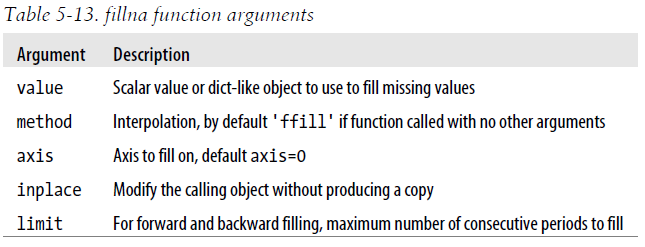

In [26]:
# fillna 함수 인자
reference(Table5_13, 500)

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>